## 연습 문제 1
붓꽃 분류 문제를 가우시안 나이브 베이즈 모형을 사용하여 풀고 다음을 구하라.

1. confusion matrix
1. classification report
1. ROC curve
1. AUC

In [18]:
%matplotlib inline
from sklearn.naive_bayes import *

In [19]:
from sklearn.datasets import load_iris
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.rename( { 'sepal length (cm)':'Sepal_length', 
             'sepal width (cm)' :'Sepal_width', 
             'petal length (cm)':'Petal_length',
             'petal width (cm)' : 'Petal_width',
             },inplace=True, axis='columns')
X = df[['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width']]
y = df['species']

In [20]:
NB = GaussianNB().fit(X, y)

(NB.predict_proba / class_log_prior x NB () x MNB () ) * class_log_prior

In [4]:
from sklearn.metrics import *
y_pred = NB.predict(X)
print("NB accuracy :", accuracy_score(y, y_pred))
print("NB confusion_matrix \n\n",confusion_matrix(y, y_pred),"\n\n")

target_names = ['setosa', 'versicolor','virginica']
print("NB",classification_report(y, y_pred, target_names=target_names))

NB accuracy : 0.96
NB confusion_matrix 

 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]] 


NB              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.94      0.94      0.94        50
  virginica       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



In [5]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() # 객체 생성
y1 = lb.fit_transform(y)

auc: 1.0
auc: 0.9902
auc: 0.9901999999999999


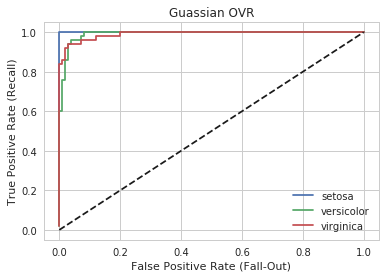

In [6]:
from sklearn.multiclass import OneVsRestClassifier

model1 = OneVsRestClassifier(GaussianNB()).fit(X, y)

fpr1, tpr1, thresholds1 =roc_curve(y1[:,0], model1.predict_proba(X)[:,0])
fpr2, tpr2, thresholds2 =roc_curve(y1[:,1], model1.predict_proba(X)[:,1])
fpr3, tpr3, thresholds3 =roc_curve(y1[:,2], model1.predict_proba(X)[:,2])

plt.plot(fpr1, tpr1, label="setosa")
plt.plot(fpr2, tpr2, label="versicolor")
plt.plot(fpr3, tpr3, label="virginica")

plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Guassian OVR')
print ("auc:",auc(fpr1, tpr1))
print ("auc:",auc(fpr2, tpr2))
print ("auc:",auc(fpr3, tpr3))

plt.show()



---

# 연습2

1) MNIST Digit 분류 문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브 베이즈 모형을 적용한다.

2) BernoulliNB 클래스의 binarize 인수를 사용하여 같은 문제를 풀어본다.

3) 계산된 모형의 모수 벡터 값을 각 클래스별로 8*8 이미지의 형태로 나타낸다. 이 이미지는 무엇을 뜻하는가?

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

BN confusion_matrix 

 [[171   0   0   0   1   3   2   0   0   1]
 [  0 146   8   0   0   1   3   0  13  11]
 [  1   8 156   3   0   0   0   1   4   4]
 [  0   2   2 155   0   2   0   7   5  10]
 [  0   3   0   0 168   1   1   5   3   0]
 [  0   0   1   2   2 166   0   0   0  11]
 [  1   5   0   0   2   0 171   0   2   0]
 [  0   0   2   0   0   0   0 175   1   1]
 [  0  15   7   1   0   5   0   2 139   5]
 [  0   0   0   3   0   3   0   8   4 162]] 


BN              precision    recall  f1-score   support

          0       0.99      0.96      0.97       178
          1       0.82      0.80      0.81       182
          2       0.89      0.88      0.88       177
          3       0.95      0.85      0.89       183
          4       0.97      0.93      0.95       181
          5       0.92      0.91      0.91       182
          6       0.97      0.94      0.96       181
          7       0.88      0.98      0.93       179
          8       0.81      0.80      0.81       174
         

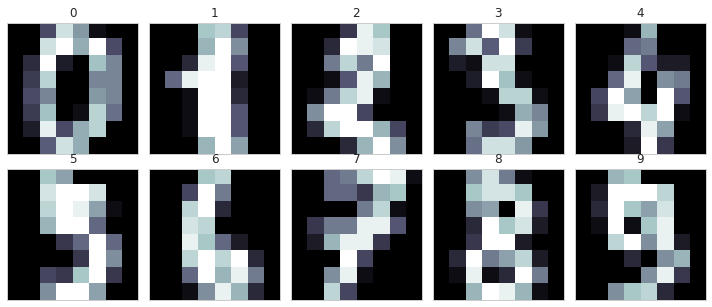

BernoulliNB(binarize=8.0)


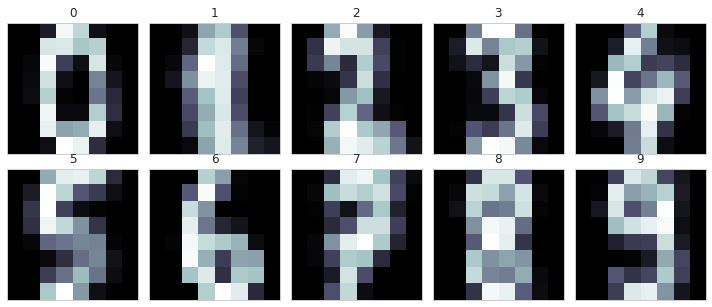

BernoulliNB(binarize=0.0)


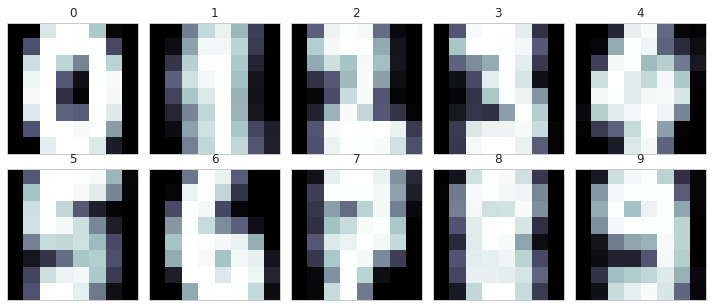

In [8]:
model_bern = BernoulliNB(binarize=8.0).fit(X, y)

y_pred = model_bern.predict(X)

print("BN confusion_matrix \n\n",confusion_matrix(y, y_pred),"\n\n")

print("BN",classification_report(y, y_pred))

print("accuracy score : ", accuracy_score(y, y_pred))
print("\n Original")
np.random.seed(0)
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

blurred = np.exp(model_bern.feature_log_prob_)
print("BernoulliNB(binarize=8.0)")
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(blurred[k].reshape(8,8), cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

model_bern = BernoulliNB(binarize=0.0).fit(X, y)

blurred = np.exp(model_bern.feature_log_prob_)
print("BernoulliNB(binarize=0.0)")
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(blurred[k].reshape(8,8), cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

In [9]:
from sklearn.datasets.mldata import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist.data
y = mnist.target

X.shape, y.shape

((70000, 784), (70000,))

BN confusion_matrix 

 [[6176    4   34   43   19  307  125    2  184    9]
 [   0 7542   73   24    3   84   26    4  103   18]
 [ 112   94 5786  175  147   21  259   77  301   18]
 [  63  147  313 5723   18  161   59   93  356  208]
 [  14   59   38    0 5496   32  118   30  143  894]
 [ 176   94   54  907  180 4421  134   27  132  188]
 [  76  169  124    5   58  222 6175    0   45    2]
 [  28  165   66   21  195    5    2 6177  141  493]
 [  91  268  114  540   83  186   45   25 5214  259]
 [  68  112   31   91  505   35    2  263  180 5671]] 


BN              precision    recall  f1-score   support

        0.0       0.91      0.89      0.90      6903
        1.0       0.87      0.96      0.91      7877
        2.0       0.87      0.83      0.85      6990
        3.0       0.76      0.80      0.78      7141
        4.0       0.82      0.81      0.81      6824
        5.0       0.81      0.70      0.75      6313
        6.0       0.89      0.90      0.89      6876
        7.0    

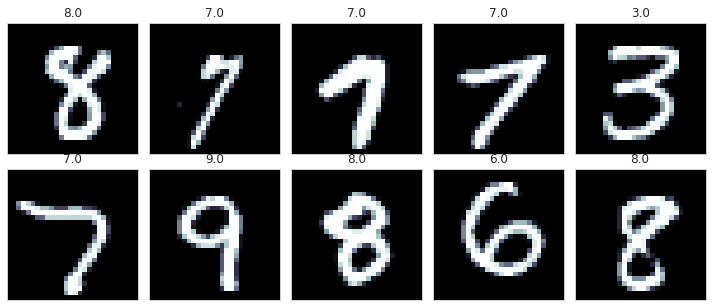

BernoulliNB(binarize=8.0)


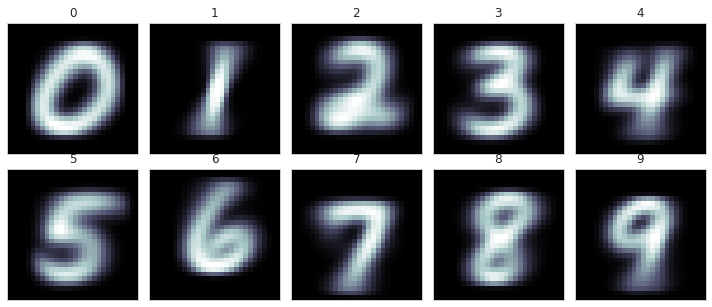

BernoulliNB(binarize=0.0)


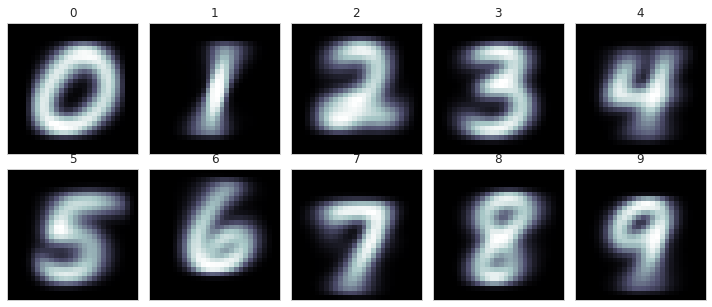

In [10]:
model_bern = BernoulliNB(binarize=8).fit(X, y)

y_pred = model_bern.predict(X)

print("BN confusion_matrix \n\n",confusion_matrix(y, y_pred),"\n\n")
print("BN",classification_report(y, y_pred))
print("accuracy score : ", accuracy_score(y, y_pred))
print("\n Original")

np.random.seed(0)
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(mnist.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(mnist.data[k].reshape(28,28), cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(mnist.target[k])
plt.tight_layout()
plt.show()

blurred = np.exp(model_bern.feature_log_prob_)
print("BernoulliNB(binarize=8.0)")
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(blurred[k].reshape(28,28), cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

model_bern = BernoulliNB(binarize=0.0).fit(X, y)

blurred = np.exp(model_bern.feature_log_prob_)
print("BernoulliNB(binarize=0.0)")
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(blurred[k].reshape(28,28), cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

28x28 이미지는 binarize차이에도 결과가 다르지 않다.

binarize - > 기준점?

## 연습 3

1. MNIST Digit 분류 문제를 다항분포 나이브 베이즈 모형을 사용하여 풀어라.
1. 만약 x 값이 정수가 아닌 실수인 경우에도 다항분포 모형을 적용할 수 있는가?
    - 문제 없다. -> 즉, TF-IDF 갖다 써도됨

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

MNB confusion_matrix 

 [[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]] 


MNB              precision    recall  f1-score   support

          0       0.99      0.98      0.99       178
          1       0.87      0.75      0.81       182
          2       0.90      0.90      0.90       177
          3       0.99      0.87      0.93       183
          4       0.96      0.96      0.96       181
          5       0.97      0.86      0.91       182
          6       0.98      0.97      0.98       181
          7       0.89      0.99      0.94       179
          8       0.78      0.89      0.83       174
       

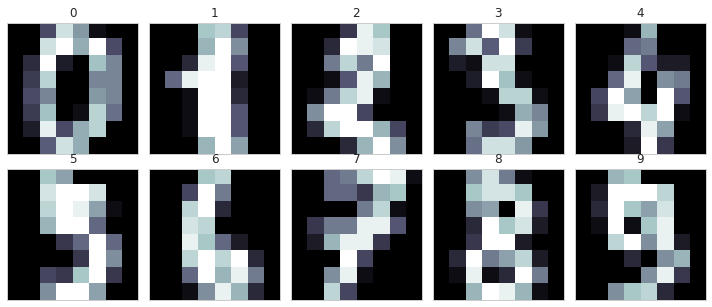


 Multinomial NB


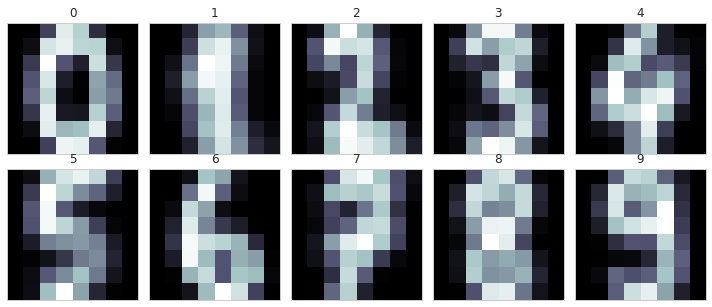

In [12]:
model_mult = MultinomialNB().fit(X, y)

y_pred = model_mult.predict(X)

print("MNB confusion_matrix \n\n",confusion_matrix(y, y_pred),"\n\n")

print("MNB",classification_report(y, y_pred))

print("accuracy score : ", accuracy_score(y, y_pred))
print("\n Original")
np.random.seed(0)
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

blurred = np.exp(model_mult.feature_log_prob_)
print("\n Multinomial NB")
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(blurred[k].reshape(8,8), cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.datasets.mldata import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist.data
y = mnist.target

X.shape, y.shape

((70000, 784), (70000,))

BN confusion_matrix 

 [[6273    4   32   25   12   90  110    1  352    4]
 [   0 7368   58   50    6   31   38    3  304   19]
 [  93   90 5809  147   74   11  304   59  387   16]
 [  38  126  336 5803   14  146   62   62  328  226]
 [  21   21   43    5 5063   15  139   15  277 1225]
 [ 182   57   51  755  132 4199  147   17  541  232]
 [  66  132   95    4   35  162 6275    0  106    1]
 [  41  122   56   29  174    1    8 6020  233  609]
 [  39  361  111  362   89  235   56   25 5288  259]
 [  48   58   26   85  467   31    4  190  267 5782]] 


BN              precision    recall  f1-score   support

        0.0       0.92      0.91      0.92      6903
        1.0       0.88      0.94      0.91      7877
        2.0       0.88      0.83      0.85      6990
        3.0       0.80      0.81      0.81      7141
        4.0       0.83      0.74      0.79      6824
        5.0       0.85      0.67      0.75      6313
        6.0       0.88      0.91      0.90      6876
        7.0    

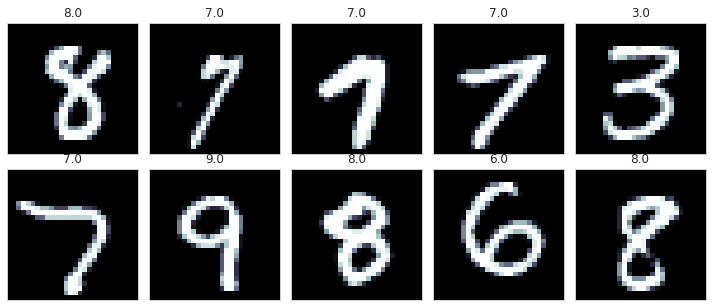

exp_MultinomialNB


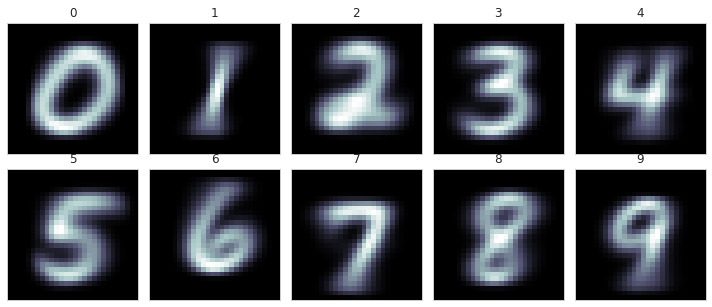

In [14]:
model_MNB = MultinomialNB().fit(X, y)

y_pred = model_MNB.predict(X)

print("BN confusion_matrix \n\n",confusion_matrix(y, y_pred),"\n\n")
print("BN",classification_report(y, y_pred))
print("accuracy score : ", accuracy_score(y, y_pred))
print("\n Original")

np.random.seed(0)
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(mnist.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(mnist.data[k].reshape(28,28), cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(mnist.target[k])
plt.tight_layout()
plt.show()

blurred = np.exp(model_MNB.feature_log_prob_)
print("exp_MultinomialNB")
N=2; M=5;
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(blurred[k].reshape(28,28), cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(k)
plt.tight_layout()
plt.show()

---

In [15]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('clf', MultinomialNB()),
         ])
model2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('clf', MultinomialNB()),
         ])
model3 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english")),
            ('clf', MultinomialNB()),
         ])
model4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('clf', MultinomialNB()),
         ])

In [17]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, clf in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(clf, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f})").format(i, np.mean(scores)))

Model0: Mean score: 0.855)
Model1: Mean score: 0.856)
Model2: Mean score: 0.883)
Model3: Mean score: 0.888)
CPU times: user 2min 46s, sys: 3.16 s, total: 2min 49s
Wall time: 2min 55s
